In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
plt.style.use('ggplot')
#% matplotlib inline
%matplotlib nbagg
np.random.seed(1)

In [2]:
Data = pd.read_csv('example_data.txt',delimiter=' ',names=['x','y','err'])

In [3]:
x_values = Data.x
y_values = Data.y
error = Data.err

<IPython.core.display.Javascript object>


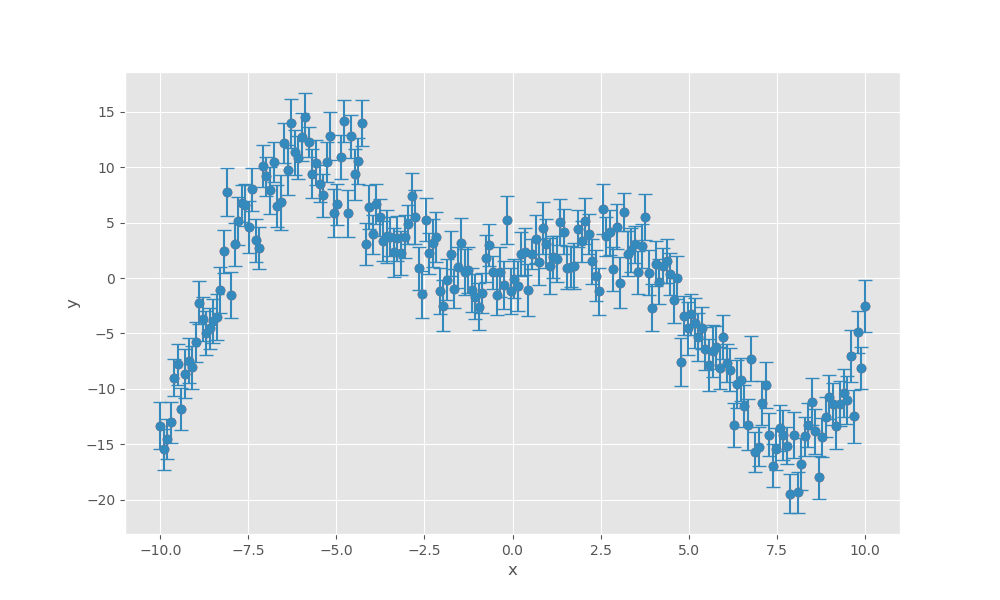

Text(0,0.5,'y')

In [4]:
plt.figure(figsize=(10,6))
plt.plot(x_values,y_values,'o',label='Data')
plt.errorbar(x_values,y_values,yerr=error,fmt='o',capsize=5)
plt.xlabel('x')
plt.ylabel('y')


In [ ]:
# 'guessed'  values of a,b,c to have an idea of the paramaters
x_val = np.linspace(-10,10,200)
y_guess = 2.6*x_val*np.sin(3*np.pi/17.5*x_val+np.pi/4)

plt.figure(figsize=(10,6))
Model, = plt.plot(x_val,y_guess,label='Model')
plt.plot(x_values,y_values,'o',color='blue',label='Data')
plt.errorbar(x_values,y_values,yerr=error,fmt='o',capsize=5)
plt.xlabel('x')
plt.ylabel('y')


In [5]:
def Model(a,b,c,x):
    y_i = a*x*np.sin(b*x+c)
    return y_i

def Likelihood(x,y,a,b,c,sigma):
    mu = Model(a,b,c,x)
    term1 = np.log(2*np.pi*(sigma**2))
    term2 = ((y-mu)**2)/2*sigma**2
    
    return sum((term1-term2))

In [6]:
#whos

In [27]:
N = 10000
nsample = 0
samples = np.zeros((N,3))

#Guess a , b ,c
theta_1 = 3
theta_2 = 0.6
theta_3 = 0.7

likelihood = []



for i in range(N):
    #Proposed jump for each parameter
    
    delta1 = np.random.normal(0,0.45)
    delta2 = np.random.normal(0,0.29)
    delta3 = np.random.normal(0,0.3)
    
    #Proposed values a,b,c
    
    theta_1_cand = theta_1 + delta1
    theta_2_cand = theta_2 + delta2
    theta_3_cand = theta_3 + delta3
    
    # flat Prior
    if (1<=theta_1_cand<=3) and (0<=theta_2_cand<=1) and (0<=theta_3_cand<=1) :
        Prior = 1
   
    else:
        Prior = 0
        
    Likelihood_proposed = Likelihood(x_values,y_values,theta_1_cand,theta_2_cand,theta_3_cand,error)*Prior
    Likelihood_current = Likelihood(x_values,y_values,theta_1,theta_2,theta_3,error)
    
    
    likelihood.append(Likelihood_proposed)
    
    #Acceptance Probability
    
    alpha = Likelihood_proposed/Likelihood_current
    
    if alpha >= 1:
        theta_1 = theta_1_cand
        theta_2 = theta_2_cand
        theta_3 = theta_3_cand
        nsample += 1
    
    else:
        u = np.random.uniform()
    
        if u <= alpha:
            theta_1 = theta_1_cand
            theta_2 = theta_2_cand
            theta_3 = theta_3_cand
        
            nsample += 1
        else:
            theta_1 = theta_1
            theta_2 = theta_2
            theta_3 = theta_3
    
    samples[i,0] = theta_1_cand 
    samples[i,1] = theta_2_cand
    samples[i,2] = theta_3_cand

Effeciency between 40% and 60% is good. Below 20 is too low, small stepsize and above 80 is too big stepsize.

In [28]:
print('Effeciency:',nsample/len(samples))

Effeciency: 0.3045


<IPython.core.display.Javascript object>


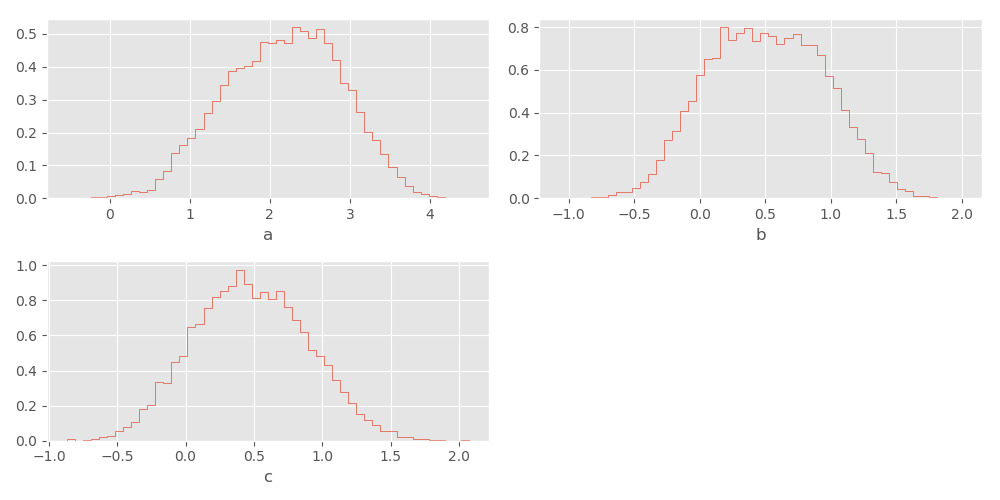

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.hist(samples[0:,0],bins=50,histtype='step',normed=True)
plt.xlabel('a')

plt.subplot(222)
plt.hist(samples[0:,1],bins=50,histtype='step',normed=True)
plt.xlabel('b')


plt.subplot(223)
plt.hist(samples[0:,2],bins=50,histtype='step',normed=True)
plt.xlabel('c')

plt.tight_layout()

<IPython.core.display.Javascript object>


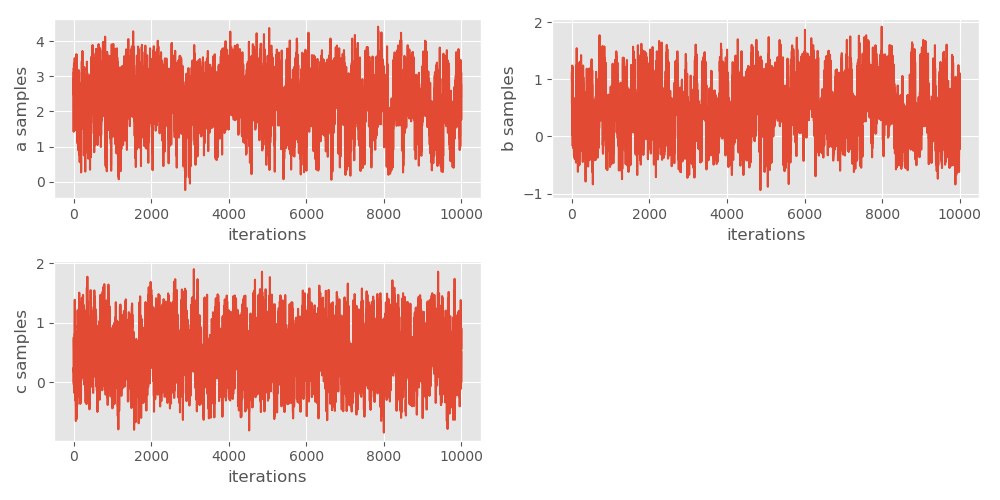

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(samples[0:,0],)
plt.ylabel('a samples')
plt.xlabel('iterations')

plt.subplot(222)
plt.plot(samples[0:,1],)
plt.ylabel('b samples')
plt.xlabel('iterations')

plt.subplot(223)
plt.plot(samples[0:,2],)
plt.ylabel('c samples')
plt.xlabel('iterations')

plt.tight_layout()

In [30]:
a_mean = np.mean(samples[0:,0])
b_mean = np.mean(samples[0:,1])
c_mean = np.mean(samples[0:,2])

In [31]:
a_mean , b_mean , c_mean

(2.1685781641624251, 0.50303461454283327, 0.47745598961796265)

<IPython.core.display.Javascript object>


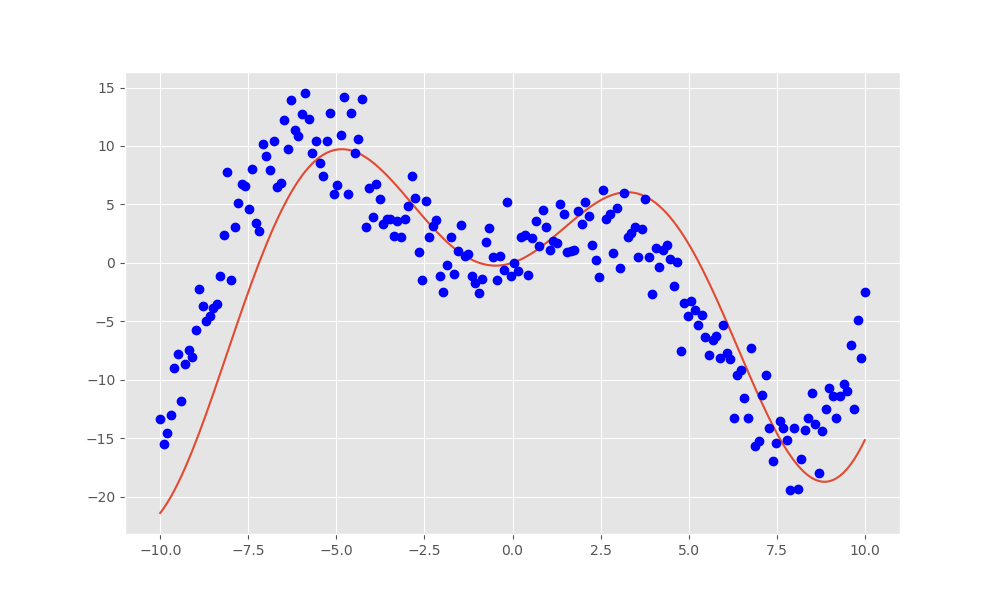

In [32]:
y_model = a_mean*x_values*np.sin(b_mean*x_values + c_mean)

plt.figure(figsize=(10,6))
plt.plot(x_values,y_model)
plt.plot(x_values,y_values,'o',color='blue')
